<a href="https://colab.research.google.com/github/jtkernan7/AB-Demo/blob/master/JT_Kernan_Water_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import data
import pandas as pd
train_features = pd.read_csv('https://drive.google.com/uc?export=download&id=14ULvX0uOgftTB2s97uS8lIx1nHGQIB0P')
train_labels = pd.read_csv('https://drive.google.com/uc?export=download&id=1r441wLr7gKGHGLyPpKauvCuUOU556S2f')
test_features = pd.read_csv('https://drive.google.com/uc?export=download&id=1wvsYl9hbRbZuIuoaLWCsW_kbcxCdocHz')
sample_submission = pd.read_csv('https://drive.google.com/uc?export=download&id=1kfJewnmhowpUo381oSn3XqsQ6Eto23XV')
train_features.shape, train_labels.shape, test_features.shape, sample_submission.shape

((59400, 40), (59400, 2), (14358, 40), (14358, 2))

In [6]:
#majority class
y_train = train_labels['status_group']
y_train.value_counts(normalize=True)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

In [7]:
# majority class baseline
from sklearn.metrics import accuracy_score

majority_class = y_train.mode()[0]
y_pred = [majority_class]* len(y_train)


accuracy_score(y_train, y_pred)

0.543080808080808

In [8]:
#train test split
from sklearn.model_selection import train_test_split

X_train = train_features.copy()

X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, train_size=0.80,
                                                 test_size=0.2, stratify = y_train, random_state = 42)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((47520, 40), (11880, 40), (47520,), (11880,))

In [0]:
#non numeric

X_train_numeric = X_train.select_dtypes('number')
X_val_numeric = X_val.select_dtypes('number')


In [10]:
#logistic regression on training data

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)
model.fit(X_train_numeric, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
#model evaluation on validation data

y_pred = model.predict(X_val_numeric)
accuracy_score(y_val, y_pred)

0.5546296296296296

In [0]:
#logistic regression predictions

## maybe come back here

In [12]:
#one hot encoder for categorical install

!pip install category_encoders

     |████████████████████████████████| 92kB 5.7MB/s 


In [0]:
import category_encoders as ce

In [14]:
#categorical features' cardinality check

X_train.describe(exclude ='number').T.sort_values(by='unique')

,count,unique,top,freq
recorded_by,47520,1,GeoData Consultants Ltd,47520
public_meeting,44876,2,True,40838
permit,45077,2,True,31071
source_class,47520,3,groundwater,36638
management_group,47520,5,user-group,42027
quantity_group,47520,5,enough,26567
quantity,47520,5,enough,26567
waterpoint_type_group,47520,6,communal standpipe,27642
quality_group,47520,6,good,40598
payment_type,47520,7,never pay,20287


In [15]:
# quantity feature exploration

X_train['quantity'].value_counts(dropna = False)

enough          26567
insufficient    12153
dry              4921
seasonal         3244
unknown           635
Name: quantity, dtype: int64

In [16]:
train = X_train.copy()
train['status_group'] = y_train

train.groupby('quantity')['status_group'].value_counts(normalize=True)

quantity      status_group           
dry           non functional             0.967689
              functional                 0.026011
              functional needs repair    0.006300
enough        functional                 0.650920
              non functional             0.276998
              functional needs repair    0.072082
insufficient  functional                 0.521106
              non functional             0.382786
              functional needs repair    0.096108
seasonal      functional                 0.580456
              non functional             0.318434
              functional needs repair    0.101110
unknown       non functional             0.713386
              functional                 0.267717
              functional needs repair    0.018898
Name: status_group, dtype: float64

In [0]:
#encode quantity feature

encoder = ce.OneHotEncoder(use_cat_names = True)
encoded = encoder.fit_transform(X_train['quantity'])

In [19]:
#one hot with scaling

from sklearn.preprocessing import StandardScaler

categorical_features = ['quantity']
numeric_features = X_train.select_dtypes('number').columns.drop('id').tolist()
features = categorical_features + numeric_features

X_train_subset = X_train[features]
X_val_subset = X_val[features]

encoder = ce.OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train_subset)
X_val_encoded = encoder.transform(X_val_subset)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)

model = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
model.fit(X_train_scaled, y_train)
print('Validation Accuracy', model.score(X_val_scaled, y_val))

Validation Accuracy 0.6579124579124579


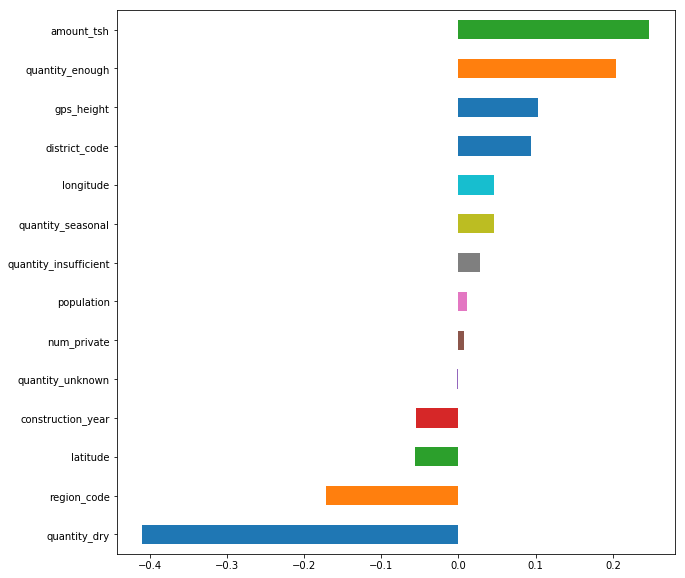

In [20]:
#get and plot coefficients
import matplotlib.pyplot as plt

coefficients = pd.Series(model.coef_[0], X_train_encoded.columns)



plt.figure(figsize= (10, 10))
coefficients.sort_values().plot.barh();


In [0]:
#work data into submission quality 

X_test_subset = test_features[features]
X_test_encoded = encoder.transform(X_test_subset)
X_test_scaled = scaler.transform(X_test_encoded)


In [0]:
y_pred = model.predict(X_test_scaled)
sumbission = sample_submission.copy()
sumbission['status_group'] = y_pred
sumbission.to_csv('submission-01.csv', index=False)

In [26]:
#check sumbission format

!head submission-01.csv

id,status_group
50785,functional
51630,functional
17168,functional
45559,non functional
49871,functional
52449,functional
24806,functional
28965,non functional
36301,non functional


In [0]:
#export file to local

from google.colab import files
files.download('submission-01.csv')